In [2]:
#Линейная регрессия
# Задача: на основе наблюдаемых точек построить прямую, которая отображает связь между двумя или более переменными.
# Регрессия пытается подогнать функцию к наблюдаемым данным, чтобы строгнозировать новые
# Линейна ярегрессия подгоняет данны ек прямой линии, пытаемся установить линейную связь

In [2]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import random
from numpy.linalg import inv, qr

(100, 1)
(100,)


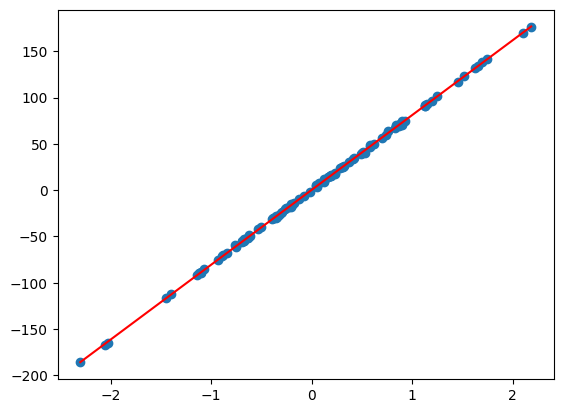

In [4]:
features, target = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=1,random_state=1)

print(features.shape)
print(target.shape)
model = LinearRegression().fit(features, target)
plt.scatter(features, target)

x = np.linspace(features.min(), features.max(), 100)

plt.plot(x, model.coef_[0]*x + model.intercept_, color = 'red')

In [5]:
# Простая линейная регрессия
# Линейная -> линейная завсимость
# прогнозирование на новых данных
# анализ взаимного влияния преременных друг на друга
# точки обучаемых данных не будут точно лежать на одной прямой(шума)
# Не позволяет делать прогнозы ВНЕ диапазна имеющихся данных
# Данные, на основании которых разрабатывается модель - это выборка из совокупности, хотелось бы чтобы это была репрезентативная выборка


In [6]:
# аналитический

data = np.array(
    [
        [1,5],
        [2,7],
        [3,7],
        [4,10],
        [5,11],
        [6,14],
        [7,17],
        [8,19],
        [9,22],
        [10,28],
    ]
)

x = data[:, 0]
y = data[:,1]
n = len(x)

w_1 = (n*sum(x[i] * y[i] for i in range(n)) - sum(x[i]  for i in range(n))*sum(y[i]  for i in range(n))) / (n * sum(x[i]**2  for i in range(n)) - sum(x[i]  for i in range(n))**2)
w_0 = (sum(y[i]  for i in range(n))) / n - w_1 * (sum(x[i]  for i in range(n)))/n

print(w_1, w_0)


2.4 0.8000000000000007


In [7]:
# метод обратных матриц

x_1 = np.vstack([x, np.ones(len(x))]).T
w = inv(x_1.transpose() @ x_1) @ (x_1.transpose() @ y)
print(w, )

[2.4 0.8]


In [8]:
# разложение матриц

Q, R = qr(x_1)
w = inv(R).dot(Q.transpose()).dot(y)
print(w)

[2.4 0.8]


2.999999999999889 4.0


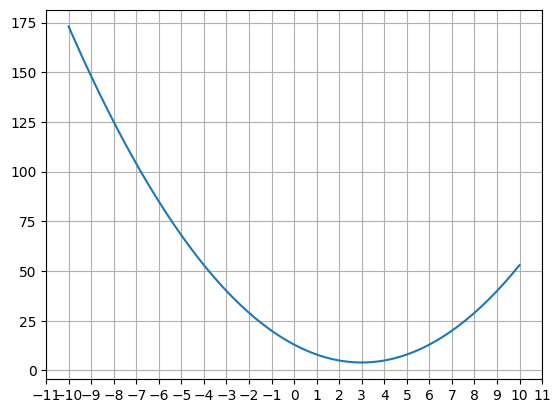

In [3]:
# градиентный спуск
def f(x):
    return (x-3)**2 + 4

def dx_f(x):
    return 2*x - 6

x = np.linspace(-10, 10,100)

ax = plt.gca()
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
plt.grid()

plt.plot(x, f(x))
# plt.plot(x, dx_f(x))


L = 0.001
itertions = 100_000

x = random.randint(0,5)
for i in range(itertions):
    d_x  =dx_f(x)
    x -= L *  d_x
print(x, f(x))


In [12]:
data = np.array(
    [
        [1,5],
        [2,7],
        [3,7],
        [4,10],
        [5,11],
        [6,14],
        [7,17],
        [8,19],
        [9,22],
        [10,28],
    ]
)

x = data[:, 0]
y = data[:,1]
n = len(x)

w1 = 0.0
w0 = 0.0

L = 0.001
iterations = 100_000

for i in range(iterations):
    D_w0 = 2* sum((-y[i] + w0 + w1*x[i]) for i in range(n))
    D_w1 = 2* sum((x[i]*(-y[i] + w0 + w1*x[i])) for i in range(n))
    w1 -= L*D_w1
    w0 -= L*D_w0

print(w1, w0)


2.4000000000000026 0.7999999999999835


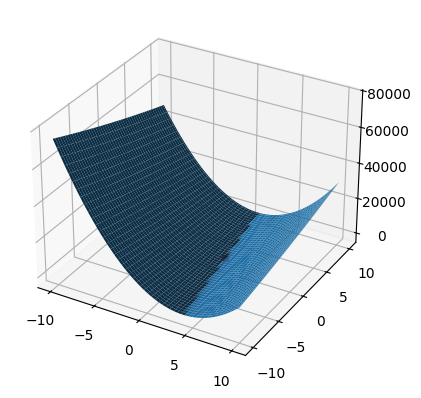

In [11]:
w1 = np.linspace(-10,10,100)
w0 = np.linspace(-10,10,100)

def E(w1,w0,x,y):
    return sum((y[i]-(w0+w1*x[i]))**2 for i in range(len(x)))

W1, W0 = np.meshgrid(w1,w0)
EW = E(W1,W0,x,y)
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot_surface(W1,W0,EW)

w1_fit = 2.4
w0_fit = 0.8
E_fit = E(w1_fit, w0_fit,x,y)
ax.scatter3D(w1_fit, w0_fit, E_fit, color = 'red')